In [1]:
import csv
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Take a stock, find what cluster it is in

In [2]:
df = pd.read_csv('CSVs/sp500_tickers_full_info.csv')

In [3]:
numeric_columns = df.select_dtypes(include=['number'])

In [4]:
df_numeric = df[['Ticker','sector']].join(df.select_dtypes(include=['number']))

In [5]:
# Check for infinity or NaN values
df_numeric = df_numeric.replace([np.inf, -np.inf], np.nan)
# Select only numeric columns and fill NaNs with their mean
numeric_cols = df_numeric.select_dtypes(include=["number"])
df_numeric[numeric_cols.columns] = numeric_cols.fillna(numeric_cols.mean())

In [6]:
# Create a correlation matrix
numeric_features = df_numeric.drop(columns=["Ticker", "sector"])
correlation_matrix = numeric_features.corr().abs()

# Select upper triangle of correlation matrix
upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)

# Find features with correlation > 0.85 (adjust threshold as needed)
high_correlation_features = [
    column for column in upper_triangle.columns if any(upper_triangle[column] > 0.85)
]

# Drop highly correlated features
numeric_features_reduced = numeric_features.drop(columns=high_correlation_features)
print(f"Reduced features from {numeric_features.shape[1]} to {numeric_features_reduced.shape[1]}")


Reduced features from 101 to 58


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Scale numeric features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_features_reduced)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=75, init="k-means++", random_state=42)
df_numeric["Cluster"] = kmeans.fit_predict(scaled_features)


In [12]:
df_numeric_with_cluster = df[["Ticker", "sector"]].join(df_numeric[["Cluster"]])
df_numeric_with_cluster.head()

,Ticker,sector,Cluster
0,MMM,Industrials,69
1,AOS,Industrials,69
2,ABT,Healthcare,71
3,ABBV,Healthcare,12
4,ACN,Technology,51


In [13]:
# Compute and sort cluster distribution
cluster_distribution = df_numeric_with_cluster["Cluster"].value_counts().sort_values(ascending=False)
cluster_distribution

18    40
13    34
12    26
10    25
71    24
      ..
61     1
7      1
43     1
37     1
53     1
Name: Cluster, Length: 75, dtype: int64

In [14]:
(cluster_distribution == 1).astype(int).sum()

27

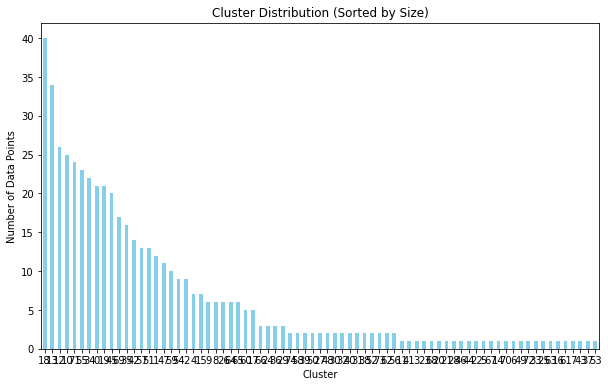

In [15]:
import matplotlib.pyplot as plt

# Plot cluster distribution (sorted)
plt.figure(figsize=(10, 6))
cluster_distribution.plot(kind="bar", color="skyblue")
plt.title("Cluster Distribution (Sorted by Size)")
plt.xlabel("Cluster")
plt.ylabel("Number of Data Points")
plt.xticks(rotation=0)
plt.show()


In [ ]:
df_numeric_with_cluster[df_numeric_with_cluster['Cluster'] == 69]

,Ticker,sector,Cluster
0,MMM,Industrials,69
1,AOS,Industrials,69
8,AFL,Financial Services,69
108,CTAS,Industrials,69
118,CMCSA,Communication Services,69
179,EL,Consumer Defensive,69
199,FMC,Basic Materials,69
229,HSY,Consumer Defensive,69
236,HRL,Consumer Defensive,69
270,K,Consumer Defensive,69


In [13]:
def create_clusters():
    df = pd.read_csv('sp500_tickers_full_info.csv')
    numeric_columns = df.select_dtypes(include=['number'])
    df_numeric = df[['Ticker','sector']].join(df.select_dtypes(include=['number']))
    df_numeric = df_numeric.replace([np.inf, -np.inf], np.nan)
    # Select only numeric columns and fill NaNs with their mean
    numeric_cols = df_numeric.select_dtypes(include=["number"])
    df_numeric[numeric_cols.columns] = numeric_cols.fillna(numeric_cols.mean())

    numeric_features = df_numeric.drop(columns=["Ticker", "sector"])
    correlation_matrix = numeric_features.corr().abs()

    # Select upper triangle of correlation matrix
    upper_triangle = correlation_matrix.where(
        np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
    )

    # Find features with correlation > 0.85 (adjust threshold as needed)
    high_correlation_features = [
        column for column in upper_triangle.columns if any(upper_triangle[column] > 0.85)
    ]

    # Drop highly correlated features
    numeric_features_reduced = numeric_features.drop(columns=high_correlation_features)

    ###Kmeans
    # Scale numeric features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(numeric_features_reduced)

    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=75, init="k-means++", random_state=42)
    df_numeric["Cluster"] = kmeans.fit_predict(scaled_features)

    df_numeric_with_cluster = df[["Ticker", "sector"]].join(df_numeric[["Cluster"]])

    return df_numeric_with_cluster

In [14]:
def SimiliarCompany(ticker, cluster_df):

    company_cluster = cluster_df[cluster_df['Ticker'] == ticker]['Cluster'].iloc[0]
    companies_in_cluster = cluster_df[cluster_df['Cluster'] == company_cluster]
    if companies_in_cluster.shape[0] == 1:
        return [ticker],[ticker]
    similiar_companies_list = companies_in_cluster['Ticker'].tolist()

    company_industry = cluster_df[cluster_df['Ticker'] == ticker]['sector'].iloc[0]
    companies_in_Sector = companies_in_cluster[companies_in_cluster['sector'] == company_industry]
    similiar_sector_list = companies_in_Sector['Ticker'].tolist()

    if ticker in similiar_companies_list:
        similiar_companies_list.remove(ticker)
    if ticker in similiar_sector_list:
        similiar_sector_list.remove(ticker)

    return similiar_companies_list, similiar_sector_list

In [18]:
test = SimiliarCompany("MMM", create_clusters())

In [20]:
x,y = test
x

['AOS',
 'AFL',
 'CTAS',
 'CMCSA',
 'EL',
 'FMC',
 'HSY',
 'HRL',
 'K',
 'LEN',
 'MKC',
 'TAP',
 'NKE',
 'ODFL',
 'PCAR',
 'SHW']

In [7]:
use_df = create_clusters()

In [12]:
use_df[use_df['Cluster'] == 3]

,Ticker,sector,Cluster
222,GS,Financial Services,3
